In [1]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [2]:
# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

### Conjunto de dados pequeno (N = 30 amostras) e com ruído

A função objetivo é dada por um polinômio de segunda ordem
$$y = 2 + x_1 + 0.5 x_1^2.$$

Geramos um conjunto pequeno com $N = 30$ amostras.

In [3]:
# Sets the number of examples.
N = 30

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

# Create target function.
y = 2 + x1 + 0.5*x1**2 # Second order polynomial.

# Noise.
w = np.random.randn(N, 1)

# Observable function.
y_noisy = y + w

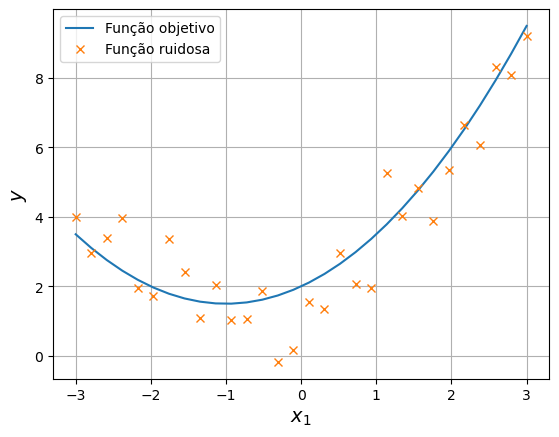

In [4]:
plt.plot(x1, y, label='Função objetivo')
plt.plot(x1, y_noisy, 'x', label='Função ruidosa')
plt.legend(loc='best')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid()
#Show the plot.
plt.show()

### Regressão polinomial com funções hipótese com ordens diferentes. 

Para criar os modelos de regressão polinomial, utilizamos 4 classes da biblioteca SciKit-Learn: `PolynomialFeatures`, `StandardScaler`, `LinearRegression` e `Pipeline`, as quais têm suas funções explicadas a seguir:

+ `PolynomialFeatures`: Cria a **matriz de atributos polinomiais** de acordo com a ordem passada para o construtor da classe. O objeto desta classe cria combinações polinomiais dos atributos de entrada com grau igual ao especificado. A classe pode ser configurada para adicionar o atributo de bias ou não através do parâmetro `include_bias`. Para mais informações, leia a documentação da classe: [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomialfeatures#sklearn.preprocessing.PolynomialFeatures).
    + Exemplo para um polinômio de ordem 2 em uma variável (i.e., atributo), $x_1$, com peso de bias (i.e., $a_0$)
$$y(i) =a_0 + a_1 x_1(i) + a_2 x_1^2(i)$$
    + Nesse caso a matriz de atributos polinomiais terá $N \times K+1$ dimensões e o seguinte formato 
$$\textbf{X} = [\textbf{x}_0, \textbf{x}_1, \textbf{x}_1^2], $$
onde $\textbf{x}_0$ é vetor de atributos de bias, ou seja, o vetor com todos os valores iguais a 1 e $\textbf{x}_1$ é o vetor com todos os valores do atributo $x_1$.
    

+ `StandardScaler`: Realiza a padronização dos atributos. O escalonamento de atributos se torna imprescindível quando utilizamos funções hipótese polinomiais, pois os termos do polinômio podem fazer com que os valores dos atributos do polinômio tenham valores muito grandes. Para mais informações, leia a documentação da classe: [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler).
    + Por exemplo, se $x_1$ varia entre 0 e 10, $x_1^2$ irá variar entre 0 e 100 e assim por diante.


+ `LinearRegression`: Realiza a regressão linear com a matriz de atributos polinomial escalonada. Esta implementação utiliza a equação normal para resolver o problema da regressão. Para mais informações, leia a documentação da classe: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression).


+ `Pipeline`: Sequencializa a aplicação de transformadores (e.g., `PolynomialFeatures`, `StandardScaler`) aos dados e ao final treina e realiza predições com o objeto da classe `LinearRegression`. Para mais informações, leia a documentação da classe: [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html?highlight=pipeline#sklearn.pipeline.Pipeline).


**OBS**.: Treinamos e validamos os modelos com o mesmo conjunto.

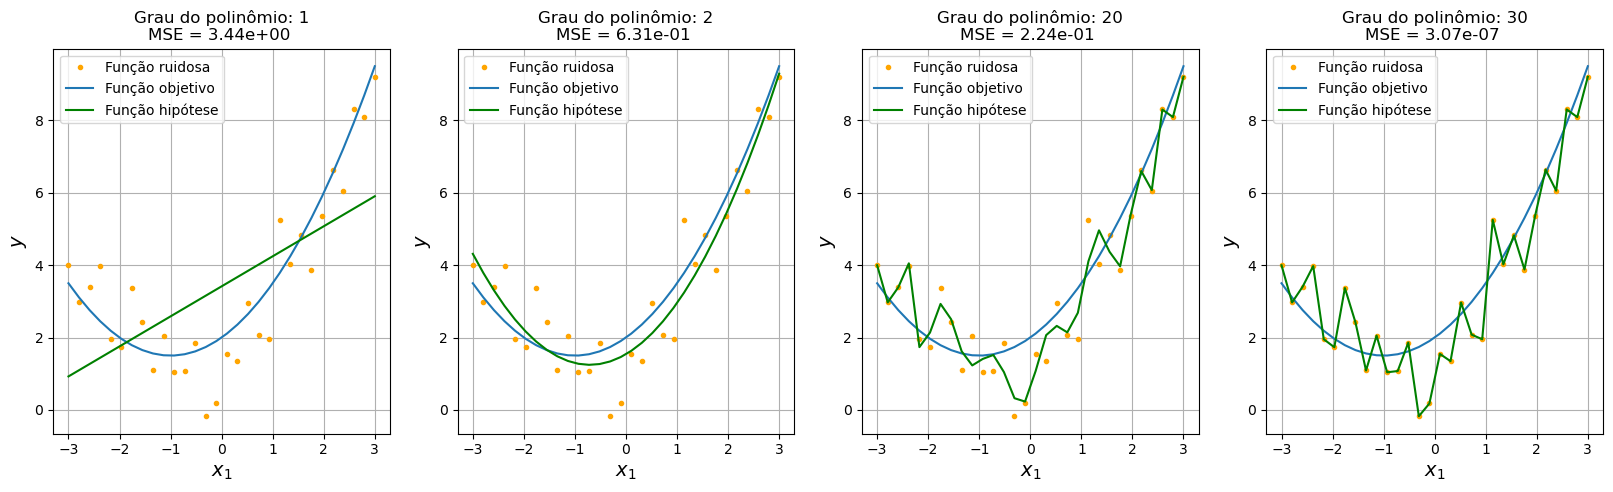

In [5]:
# Polinomial degrees to be tested.
degrees = [1, 2, 20, 30]

# Include column of ones once the target function has a bias.
include_bias = True

# Create a figure.
plt.figure(figsize=(20, 5))

# Loop that iterates over the different degree values.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)  

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    polynomial_regression.fit(x1, y_noisy)
    
    # Use the trained model for prediction.
    yp1 = polynomial_regression.predict(x1)
    
    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, yp1)
    
    plt.plot(x1, y_noisy, '.', color='orange', label='Função ruidosa')
    plt.plot(x1, y, label='Função objetivo')
    plt.plot(x1, yp1, 'g', label='Função hipótese')
    plt.legend(loc='best')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e} ".format(degrees[i], mse))

#Show the plot.
plt.show()

#### Observações

+ O polinômio de ordem 1 (i.e., uma reta) **não consegue se contorcer o suficiente para aproximar a função verdadeira**.
    + O polinômio de ordem 1 não tem flexibilidade (i.e., graus de liberdade) o suficiente para capturar o comportamento da função objetivo.
    + Comportamento conhecido como **subajuste** ou **underfitting**, do inglês: o modelo tem baixa flexibilidade e baixa capacidade de generalização.
        + **Generalização**: capacidade do modelo em predizer corretamente valores que não foram usados no treinamento.
    + O MSE produzido pelo modelo é alto tanto para os exemplos do conjunto de treinamento quanto para dados inéditos.


+ O polinômio de ordem 2 se ajusta bem à função verdadeira.
    + MSE é próximo do esperado, ou seja, próximo da variância do ruído, que é igual a 1.
    + O modelo apresenta boa relação de compromisso entre flexibilidade e generalização.
    + O MSE produzido pelo modelo é baixo para os exemplos do conjunto de treinamento e para dados inéditos. 


+ Já os polinômios de ordem 20 e 30 têm flexibilidade tão alta que se ajustam não à função verdadeira, mas sim aos dados ruidosos.
    + É como se o modelo **memorizasse** os dados de treinamento.
    + O modelo se ajusta mais e mais ao conjunto ruidoso de treinamento conforme sua ordem (i.e., grau de liberdade) se aproxima do número de amostras do conjunto.
    + Comportamento conhecido como **sobreajuste** ou **overfitting**, do inglês: o modelo tem flexibilidade muito alta e grau de generalização muito baixo (modelo aprendido se distancia muito do modelo gerador).
    + O MSE produzido pelo modelo é muito baixo para os exemplos do conjunto de treinamento e muito alto para exemplos inéditos.


+ Como podemos percerber, o erro quadrático médio (MSE) é menor para o polinômio de ordem 30, pois devido à sua alta "complexidade/flexibilidade" ele se "ajusta" quase que perfeitamente aos dados de treinamento, "aprendendo" até o ruído presente.
    + A predição feita com o próprio conjunto usado para o treinamento resulta em valores de saída idênticos aos aprendidados pelo modelo, resultado em um erro praticamente nulo.

### Conjunto de dados pequeno (N = 30 amostras), porém, sem ruído.

Usamos a mesma função objetivo anterior, porém, não adicionamos ruído a ela.

In [6]:
# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

In [7]:
# Sets the number of examples.
N = 30

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

# Create target function
y = 2 + x1 + 0.5*x1**2

# Observable function.
y_noisy = y

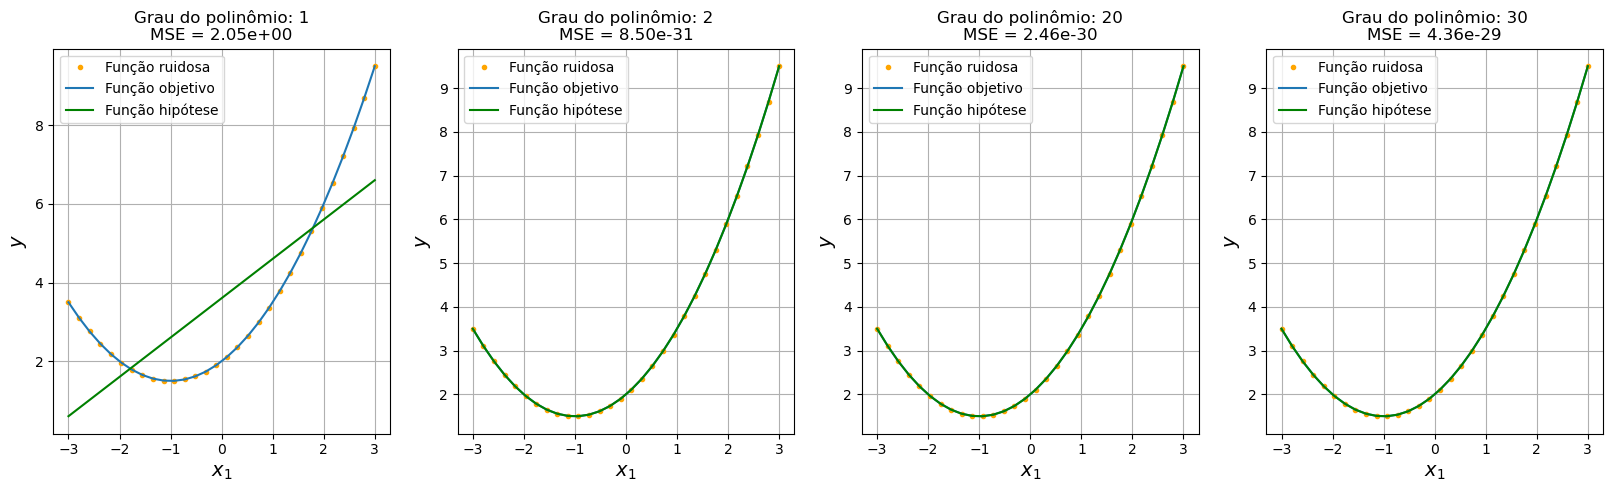

In [8]:
# Polinomial degrees to be tested.
degrees = [1, 2, 20, 30]

# Include column of ones once the target function has a bias.
include_bias = True

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)  

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    polynomial_regression.fit(x1, y_noisy)
    
    # Use the trained model for prediction.
    yp1 = polynomial_regression.predict(x1)    
    
    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, yp1)
    
    plt.plot(x1, y_noisy, '.', color='orange', label='Função ruidosa')
    plt.plot(x1, y, label='Função objetivo')
    plt.plot(x1, yp1, 'g', label='Função hipótese')
    plt.legend(loc='best')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e}".format(degrees[i], mse))

#Show the plot.
plt.show()

#### Observações

+ Como não existe ruído sendo adicionado aos exemplos do modelo gerador, qualquer polinômio com ordem maior ou igual à ordem do modelo gerador (neste caso, um polinômio de ordem 2) já consegue aproximar perfeitamente os dados de treinamento.


+ Porém, mesmo sem ruído algum, a reta (polinômio de ordem 1) não tem flexibilidade o suficiente para capturar o comportamento da função objetivo.
    + Ou seja, o fator limitante aqui é a complexidade (i.e., ordem do polinômio).

### Conjunto de treinamento maior (N = 1000 amostras) e com ruído

Usamos a mesma função objetivo anterior, mas agora com ruído e mais amostras.

In [9]:
# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

In [10]:
# Sets the number of examples.
N = 1000

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

# Create target function
y = 2 + x1 + 0.5*x1**2

# Noise.
w = np.random.randn(N, 1)

# Observable function.
y_noisy = y + w

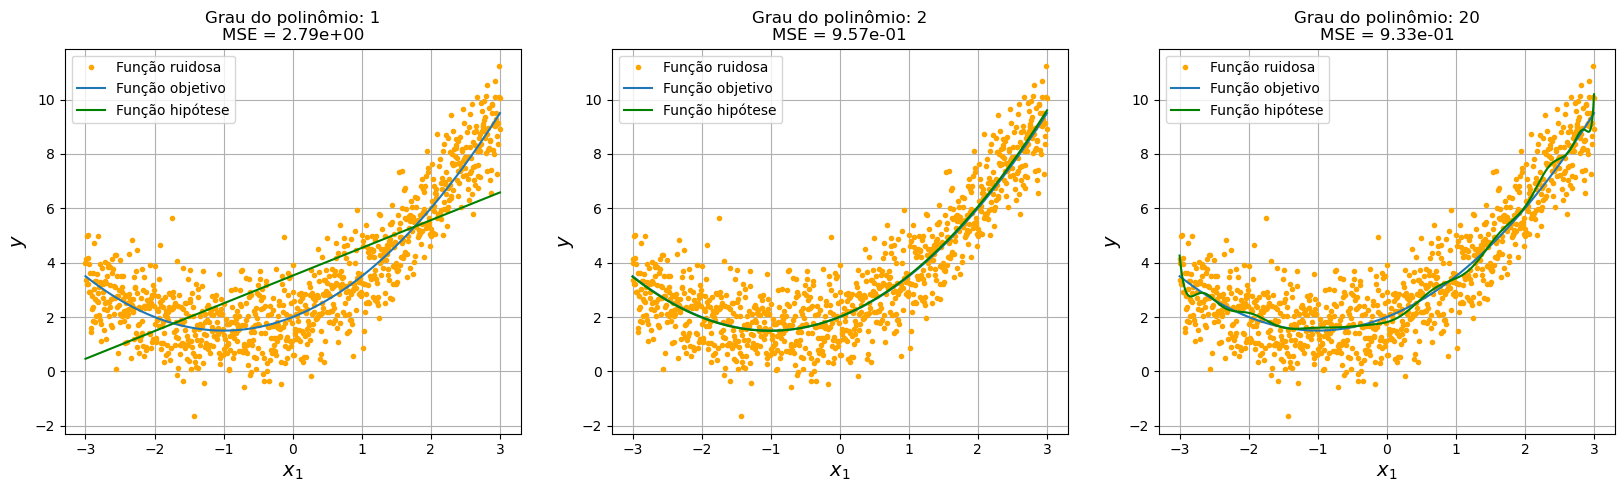

In [11]:
# Polinomial degrees to be tested.
degrees = [1, 2, 20]

# Include column of ones once the target function has a bias.
include_bias = True

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1) 

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    polynomial_regression.fit(x1, y_noisy)
    
    # Use the trained model for prediction.
    yp1 = polynomial_regression.predict(x1)    
    
    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, yp1)
    
    plt.plot(x1, y_noisy, '.', color='orange', label='Função ruidosa')
    plt.plot(x1, y, label='Função objetivo')
    plt.plot(x1, yp1, 'g', label='Função hipótese')
    plt.legend(loc='best')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e}".format(degrees[i], mse))

#Show the plot.
plt.show()

#### Observações

+ A aproximação obtida pelo modelo será melhor quanto maior for o conjunto de treinamento. 


+ Para ordem 2, vemos que o aumento do conjunto de treinamento resultou em um modelo melhor. 


+ Porém, com o aumento da ordem do polinômio, percebemos que o modelo começa a se sobreajustar aos dados de treinamento, mas percebam que ele se sobreajusta menos do que no caso com 30 amostras, pois o número de amostras é muito maior do que a ordem do modelo.
    + Ou seja, o modelo não tem complexidade o suficiente para memorizar as amostras de treinamento.


+ No caso de um polinômio de ordem 1, não importa o quão grande seja o conjunto de treinamento, ele nunca irá se ajustar ao modelo gerador, pois não tem flexibilidade o suficiente.

### Conjunto de treinamento maior ainda (N = 100.000 amostras)

Usamos a mesma função objetivo anterior, com ruído e muito mais amostras.

In [12]:
# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

In [13]:
# Sets the number of examples.
N = 100000

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

# Create target function.
y = 2 + x1 + 0.5*x1**2

# Noise. 
w = np.random.randn(N, 1)

# Observable function.
y_noisy = y + w

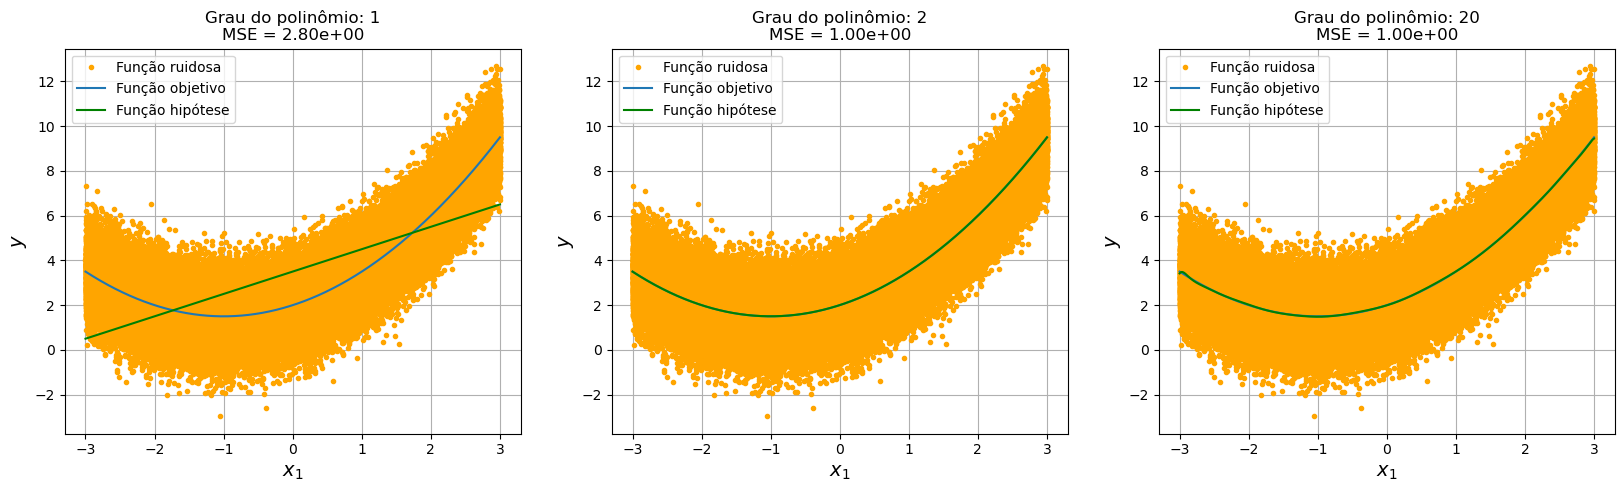

In [14]:
# Polinomial degrees to be tested.
degrees = [1, 2, 20]

# Include column of ones once the target function has a bias.
include_bias = True

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)    

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    polynomial_regression.fit(x1, y_noisy)
    
    # Use the trained model for prediction.
    yp1 = polynomial_regression.predict(x1)    
    
    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, yp1)

    plt.plot(x1, y_noisy, '.', color='orange', label='Função ruidosa')
    plt.plot(x1, y, label='Função objetivo')
    plt.plot(x1, yp1, 'g', label='Função hipótese')
    plt.legend(loc='best')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e}".format(degrees[i], mse))

#Show the plot.
plt.show()

#### Observações

+ Encontra-se os pesos que fazem com que a função hipótese polinomial escolhida tenha o **erro** (quadrático) **médio** minimizado para todos os valores de $x_1$. 


+ Vejam que como as ordens dos polinômios são muito menores (2 e 20) do que a quantidade de amostras, a função hipótese polinomial escolhida não se ajusta perfeitamente aos pontos, mas acaba se ajustando à média dos valores de $y$ naquele determinado valor de $x_1$.


+ Como utilizamos muitos exemplos de treinamento, a capacidade (i.e., flexibilidade) dos modelos não é suficiente para memorizar todos os pontos, ele então deixa de aprender o ruído para se concentrar em aprender a função por trás do processo de geração dos dados.


+ O polinômio de ordem 1 continua não tendo flexibilidade o suficiente para aproximar a função objetivo, mesmo com um número muito grande de amostras.

## Conclusões

+ Para evitar o **sobreajuste**: 
    + Diminuímos a complexidade do modelo (no caso dos polinômios, reduzimos sua ordem).
    + Aumentamos o conjunto de treinamento de modo a termos muito mais amostras do que graus de liberdade do modelo.
    
  
+ Para evitar o **subajuste**:
    + Não importa o tamanho do conjunto de treinamento, o modelo não tem flexibilidade o suficiente para capturar o comportamento do modelo gerador.
    + A única forma para evitar o subajuste é aumentar a complexidade do modelo (no caso dos polinômios, aumentar sua ordem).
    
    
+ Na sequência, veremos como encontrar **quantitativamente** um modelo que apresente uma **boa relação de compromisso entre flexibilidade e grau de generalização**.
    + Para isso, utilizaremos os erros obtidos com o conjunto de treinamento e de validação (exemplos inéditos) para vários níveis de complexidade do modelo (no caso dos polinômios, para várias ordens).